1.- ¿Por qué una matriz equivale a una transformación lineal entre espacios vectoriales?

Cuando multiplicamos una matriz de mxn por un vector de nx1 el resultado es un vector de mx1, dependiendo de los valores de la matriz, el nuevo vector puede “estirar”, “contraer” o colapsar las dimensiones del vector, estas operaciones no es más que un re-ajuste del vector original (para el caso particular de nxn) así que en realidad lo único que hizo la matriz fue “Ajustar” al vector original en función de los valores particulares de sus columnas.

2.- ¿Cuál es el efecto de transformación lineal de una matriz diagonal y una ortogonal?

a) Matriz Diagonal: Re-escalamiento del vector original, "Estira" o "Contrae" o ambas al vector original. ejemplo: 

In [49]:
import numpy as np

In [50]:
"Estira"
a=np.matrix([[2,0,0],[0,2,0],[0,0,2]])
b=np.matrix([[1],[1],[1]])
c=a*b
print("Estira")
print(c)
"Contrae"
e=np.matrix([[.5,0,0],[0,.5,0],[0,0,.5]])
f=np.matrix([[1],[1],[1]])
d=e*f
print("Contrae")
print(d)

Estira
[[2]
 [2]
 [2]]
Contrae
[[ 0.5]
 [ 0.5]
 [ 0.5]]


b) Matriz Ortogonal: Rota el vector original

In [51]:
"Rota"
a=np.matrix([[1,0],[0,-1]])
b=np.matrix([[1],[1]])
c=a*b
d=a*a
print("La matriz a es diagonal, para comprobarlo lo multiplicamos por su transpuesta y nos devuelve I")
print(d)
print("La matriz a refleja o rota a lo largo del eje x al vector original")
print(c)

La matriz a es diagonal, para comprobarlo lo multiplicamos por su transpuesta y nos devuelve I
[[1 0]
 [0 1]]
La matriz a refleja o rota a lo largo del eje x al vector original
[[ 1]
 [-1]]


3.- Que es la descomposición SVD ?

Intuitivamente la descomposición SVD, genera tres matrices, U,S,V dónde U y V son matrices ortogonales y S es una matriz diagonal con los valores singulares de A ordenados de menor a mayor. Esto quiere decir que cualquier matriz(particularmente si la pensamos como una transformación lineal) se puede ver como una rotación + un re-escalamiento + otra rotación. 

In [52]:
a=np.matrix([[0,0],[0,9],[3,0]])
print(a)
print("La matriz a se puede visualizar como")
(U,S,V)=np.linalg.svd(a)
print("Rotación")
print(U)
print("+ un Re-Escalamiento")
print(S)
print("+ Otra Rotación")
print(V)

[[0 0]
 [0 9]
 [3 0]]
La matriz a se puede visualizar como
Rotación
[[ 0.  0. -1.]
 [ 1.  0.  0.]
 [ 0. -1.  0.]]
+ un Re-Escalamiento
[ 9.  3.]
+ Otra Rotación
[[ 0.  1.]
 [-1. -0.]]


4.- Que es diagonalizar y que representan los eigenvectores? 

Diagonalizar una matriz es una forma de factorización que implica re-escribir la matriz de forma más sencilla, PDP^(-1), en dónde P es unaq matriz invertible que cuyas columnas son los eigenvectores de la matriz original y D es una matriz diagonal que contiene los eigenvalores de la transofrmación original. Los eigenvectores son  los vectores no nulos que que cuando son transformados por la matriz original dan lugar a un multiplo escalar de si mismos o no son afectados por la transformación.

5 .- Intuitivamente que representan los eigenvectores ?

Intuitivamente una transformación actua sobre algún vector re-escalandolo o cambiando su dirección, existen vectores para los cuales la transformación solamente hace un re-escalamiento, preservando su dirección estos son los eigenvectores de la transformación. 

6.- Como interpretas la SVD como una composición de tres transformaciones lineales sencillas?

In [60]:
a=np.matrix([[0,0],[0,9],[3,0]])
print(a)
print("La matriz a se puede visualizar como")
(U,S,V)=np.linalg.svd(a)
print("Rotación")
print(U)
print("+ un Re-Escalamiento")
print(S)
print("+ Otra Rotación")
print(V)

[[0 0]
 [0 9]
 [3 0]]
La matriz a se puede visualizar como
Rotación
[[ 0.  0. -1.]
 [ 1.  0.  0.]
 [ 0. -1.  0.]]
+ un Re-Escalamiento
[ 9.  3.]
+ Otra Rotación
[[ 0.  1.]
 [-1. -0.]]


7.- Que relación hay entre SVD y diagonalización ?

Para una matriz normal ( At*A=A*At ) podemos obtener la descomposición SVD de una diagonalización ortonormal de la misma, si la matriz no es normal esta relación no existe.

8.- Como se usa la SVD para dar una aproximación de menor rango de una matriz?


La SVD nos permite escribir cualquier matriz A de mxn como una suma finita de matrices de rango 1, etsa suma la podemos cortar cuando los valores singulares de la descomposición sean lo suficientemente pequeños. Aupongamos que contruimos: 

A1 = s1*R1
A2 = s1*R1 + s2*R2
.
.
.
Ar= s1*R1 + ..... + sr*Rr

Entonce se puede demostrar que la matriz de rango 1 mas parecida a la original es precisamente la matriz A1 y logicamente A coincide con Ar. 

9.- Describe el método de minimización por descenso gradiente 

Se considera un punto inicial x=x0, se escoge una dirección de descenso dk = - grad(f(x^k), se realiza una busqueda lienal que seleccione sun paso ak tal que g(ak)=f(x^k + ak*dk) < f(x^k) = gk(0), hacemos x^(k+1)= x^k + ak*dk, se hace un test de covergencia, si converge se detiene el método si no se regresa al segundo paso hasta alcanzar la convergencia





10 - Menciona 4 problemas de optimización ( dos con restricciones y dos sin restricciones ) que te parezcan interesantes 

Parte 2







Agoritmo de compresión 

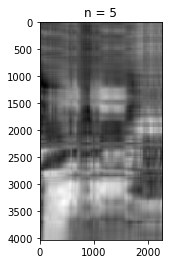

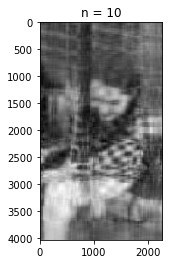

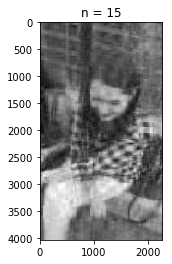

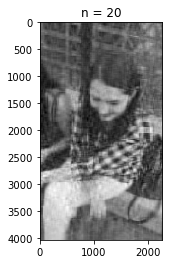

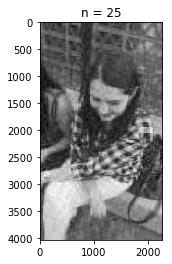

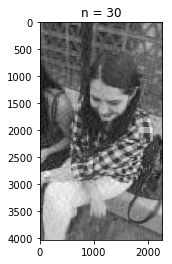

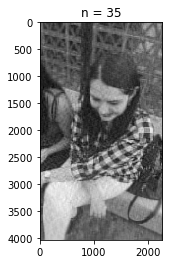

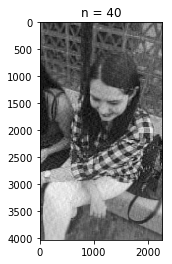

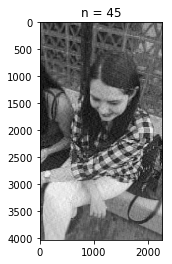

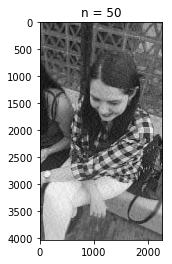

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image

#Ponemos cualquier imagen ( si es a color la convierte a B&W)

img = Image.open('Ange.png')

#La convertimoa a b&W
imggray = img.convert('LA')
#Guardamos los datos en una matriz 
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

#Hacemos la SVD
U, sigma, V = np.linalg.svd(imgmat)
#Hacemos un for para ver como se ve la imagen comprimida con los primeros n vectores de la SVD 
for i in range(5, 51, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()
    







Pseudoinversa

In [171]:
def solver(a,b):
    import numpy as np
    c=np.linalg.pinv(a)
    d=c*b
    return d

a=np.matrix([[3,1],[2,3]])
b= np.matrix([[9],[13]])

f= solver(a,b)
print(f)

[[ 2.]
 [ 3.]]


Pandas

Alpha es: [[ 25.32646778]]
Beta es: [ 353.1648795]
El resultado es: [[ 353.1648795 ]
 [  25.32646778]]


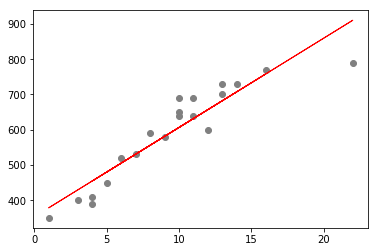

In [250]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


#Sacamos los datos desde el archivo csv
data = pd.read_csv('Data.csv')
x_y = np.array(data)
x, y = x_y[:,0], x_y[:,1]
x, y = x.reshape(-1,1), y.reshape(-1, 1)
#llamamos el método de regresión lineal
lin_regression = LinearRegression()
lin_regression.fit(x,y)

#Sacamos los coeficientes
alpha = lin_regression.coef_
beta = lin_regression.intercept_

print("Alpha es:",alpha)
print("Beta es:",beta)
#para sacar las predicciones
predictions = lin_regression.predict(x)


#Sacamos al pseudoinversa:
newx = x_y[:,0]
newx2 = [value for value in newx]
newx3=np.ones(shape=(len(x),2))
#creamos el vector con 1s en la primer columna y el valor de horas en la segunda
for i in range(len(x)):
        newx3[i]=[1,newx2[i]]
#Sacamos la pseudoinversa
c=np.linalg.pinv(newx3)
#resolvemos el sistema
results=np.matmul(c,y)
#Lo imprimimos para ver que sea el mismo que el calculado por el algoritmo de regresión
print("El resultado es:", results)
#Lo mostramos en un plot (Avanzado) predicciones vs valores
plt.scatter(x, y,  color='grey')
plt.plot(x, predictions, color='red',linewidth=1)
plt.show()